[View in Colaboratory](https://colab.research.google.com/github/wo1ever/TIL/blob/master/180726_%EB%8F%84%EC%84%9C%EA%B4%80_%EB%8D%B0%EC%9D%B4%ED%84%B0_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb)

공공데이터포털의 [전국도서관표준데이터](https://www.data.go.kr/dataset/15013109/standard.do) 일부를 실습용으로 가공하였습니다.

# 사전 준비

In [3]:
# 나눔글꼴 설치
!apt install fonts-nanum

# Plotnine 패키지 설치
!pip install plotnine
# ! 가 붙은 코딩은 파이썬 코딩이 아니라 운영체제에 바로 보내지는 명령어

# 기본 글꼴 변경
import matplotlib as mpl
mpl.font_manager._rebuild()
mpl.pyplot.rc('font', family='NanumBarunGothic')

# 레티나 디스플레이 지원
%config InlineBackend.figure_format = 'retina'

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20161025-1).
0 upgraded, 0 newly installed, 0 to remove and 0 not upgraded.


데이터 읽어오기.

In [4]:
import pandas as pd
import numpy as np
from plotnine import *

src = pd.read_csv('https://s3.ap-northeast-2.amazonaws.com/data10902/messy/library.csv')

/usr/local/lib/python3.6/dist-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


데이터 복사본 만들기. 중간에 데이터가 망가지면 이 셀부터 다시 실행하면 됩니다 :)

In [5]:
df = src.copy()
df.head(30)

,key,도서관명,전화번호,위경도,좌석수,도서,연속간행물,비도서,휴관일
0,0,한밭도서관(대전광역시),042-270-7420,"36.309678,127.409648",656,802933,530,123515,매주 월요일
1,1,충주시립도서관(충청북도),043-850-3971,"37.160015,127.450014",517,378786,117,10175,매주 월요일
2,2,김해도서관(경상남도),055-320-5510,"35.233151,128.874325",1202,322150,195,17470,매주 월요일 및 국가지정공휴일
3,3,강릉시립중앙도서관(강원도),033-660-3279,"37.773104,128.912992",464,316468,24,6072,월요일 및 국가지정 공휴일
4,4,하안도서관(경기도),02-2680-2874,"37.467855,126.873710",806,315548,916,30410,"매주 금요일, 국가지정공휴일"
5,5,경기도립성남도서관(경기도),031-730-3500,"37.446635,127.150098",799,311395,142,42467,"매주월요일, 국가지정공휴일"
6,6,창원도서관(경상남도),055-278-2801,"35.224309,128.663941",1222,311332,487,27471,매주 월요일 및 국가지정공휴일
7,7,남부도서관(울산광역시),052-259-7580,"35.535878,129.294949",1405,304433,476,23384,"매주 월요일, 법정공휴일"
8,8,시립중앙도서관(경기도),031-760-5678,"37.410561,127.252878",789,303448,138,14455,매주월요일+국가지정공휴일
9,9,석수도서관(경기도),031-8045-6106,"37.411601,126.902654",2000,302086,277,88169,"매주 월요일, 국가지정공휴일"


# 데이터 살펴보기

시도별 도서관 수는?

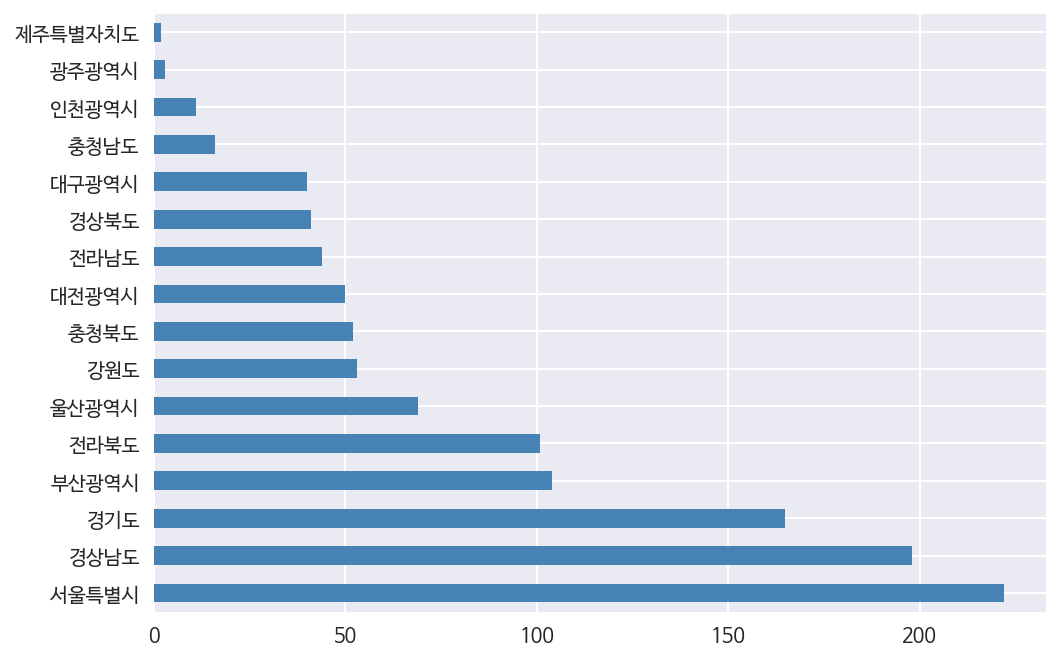

In [41]:
result = df['도서관명'].str.extract(r'\(([^)]+)\)$', expand=False).value_counts()
# expand = Fasle 하면 결과물로 판다스 Series가 나옴
# True로 하면 결과물로 데이터프레임이 나옴
# 하나의 column이 시리즈 > 시리즈들이 모인게 데이터프레임
# df['도서관명'].str.extract(r'\((\w+[도|시])\)', expand=False).value_counts()

result.plot.barh(color='steelblue')

소장자료수(도서, 연속간행물, 비도서를 모두 합한 값)가 가장 많은 도서관은?

In [42]:
df['자료수'] = df['도서'] + df['연속간행물'] + df['비도서']
# 같은 데이터프레임에서 가져와 행의 수가 같아서 더하기 가능.

df.sort_values(by='자료수', ascending=False).head(1)

,key,도서관명,전화번호,위경도,좌석수,도서,연속간행물,비도서,휴관일,자료수
0,0,한밭도서관(대전광역시),042-270-7420,"36.309678,127.409648",656,802933,530,123515,매주 월요일,926978


일요일에 쉬는 도서관은?

In [43]:
df['휴관일'].value_counts()
df['휴관일'].head(10)
df['휴관일'].unique

for x in set(df['휴관일']):
  print(x)
# 판다스의 집합으로 바꾸어 주면 바로 unique만 뽑을 수 있음.

일요일, 공휴일
매주토,일요일
월요일 및 국가지정 공휴일
매주월요일,국가지정공휴일
토 일 공휴일
국가지정공휴일
토요일+일요일+공휴일
법정공휴일, 주말
매주 일요일, 국가지정공휴일
토요일, 법정공휴일
매주 월요일 및 국가지정 공휴일
매주 월요일 및 국가지정공휴일
없음
매주 주말, 국가지정공휴일
매주 일, 월요일/ 법정 공휴일
매주 금요일, 국가지정공휴일
매주 토,일요일,국가지정공휴일
월요일, 공휴일
매주 토/일요일/국가지정공휴일
일요일
일요일, 법정공휴일
매주토요일, 매주일요일, 법정공휴일
토, 일, 공휴일
월요일
매주월요일, 국가지정공휴일
매주일요일+국가지정공휴일
토, 일, 법정공휴일
주말, 법정공휴일
매주 월요일 및 법정공휴일
토,일,공휴일
매주월요일+국가지정공휴일
매주 토, 일요일 및 국가지정 공휴일
매주월요일, 법정공휴일
매주월요일 국가지정공휴일
매주 일요일
매주 월요일
매주 토요일, 일요일, 공휴일
매주 토요일, 일요일, 법정공휴일
매주 월요일 국가지정 공휴일
월요일, 법정공휴일
매주월요일
매주월,일요일,국가지정공휴일
매주토, 일요일
공휴일
매주 월요일, 법정공휴일
법정공휴일
매주 월요일, 국가지정공휴일
법정공휴일, 일요일
매주 토요일·일요일, 국가지정공휴일


In [0]:
df['휴관일'].str.extract(r'(일요일|주말|[\b\s,]일[\b\s,])')

In [0]:
pattern = r'(일요일|주말|[\b\s,]일[\b\s,])'

a = set(df['휴관일'])
b = set(df['휴관일'][df['휴관일'].str.contains(pattern)])
a - b

# 차집합을 이용하여 확인해보기

df['휴관일'][df['휴관일'].str.contains(pattern)]
df['휴관일'].str.contains(pattern)

In [46]:
df.loc[df['휴관일'].str.contains(pattern)][['도서관명', '휴관일']]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  """Entry point for launching an IPython kernel.


,도서관명,휴관일
30,유원대학교 도서관(충청북도),토요일+일요일+공휴일
82,삼례분관(전라북도),"일요일, 법정공휴일"
187,중리초등복합시설도서관(경상남도),매주 일요일
189,고산분관(전라북도),"일요일, 법정공휴일"
193,완주군립중앙(전라북도),"일요일, 법정공휴일"
201,전북도청도서관(전라북도),"토,일,공휴일"
247,구갈희망누리도서관(경기도),매주 일요일
248,둔산영어도서관(전라북도),"일요일, 법정공휴일"
250,대구시청작은도서관(대구광역시),"토,일,공휴일"
254,당정문화도서관(경기도),"토,일,공휴일"


# 데이터 다듬기

"위도"와 "경도" 분리하기.

In [47]:
df.head(5)

# 지역 관령 정보 통일(동시구, ...) 혹은 큰 단위만 적기
# 지역 칼럼을 별도로 분리
# 휴관일 양식을 통일 -> 어떻게?
# 위도와 경도를 분리 혹은 삭제
# 전화번호 양식 통일


,key,도서관명,전화번호,위경도,좌석수,도서,연속간행물,비도서,휴관일,자료수
0,0,한밭도서관(대전광역시),042-270-7420,"36.309678,127.409648",656,802933,530,123515,매주 월요일,926978
1,1,충주시립도서관(충청북도),043-850-3971,"37.160015,127.450014",517,378786,117,10175,매주 월요일,389078
2,2,김해도서관(경상남도),055-320-5510,"35.233151,128.874325",1202,322150,195,17470,매주 월요일 및 국가지정공휴일,339815
3,3,강릉시립중앙도서관(강원도),033-660-3279,"37.773104,128.912992",464,316468,24,6072,월요일 및 국가지정 공휴일,322564
4,4,하안도서관(경기도),02-2680-2874,"37.467855,126.873710",806,315548,916,30410,"매주 금요일, 국가지정공휴일",346874


In [48]:
df['위도'] = df['위경도'].str.extract(r'(.+),', expand=False).astype(np.float32)
df['위도']

# df['위경도']를 찍으면 series로 저장됨. str 함수 > extract함수를 찾음.

df['경도'] = df['위경도'].str.extract(r'.+,(.+)', expand=False).astype(np.float32)
df['경도']

0       127.409645
1       127.450012
2       128.874329
3       128.912994
4       126.873711
5       127.150101
6       128.663940
7       129.294952
8       127.252876
9       126.902657
10      128.355713
11      126.926224
12      127.147850
13      127.147987
14      126.821556
15      128.584778
16      128.210266
17      126.449242
18      129.425079
19      127.032776
20      127.505768
21      126.928490
22      127.936020
23      129.096191
24      129.137741
25      126.957802
26      127.137817
27      126.851418
28      126.969025
29      127.436913
           ...    
1141    129.034302
1142    129.332123
1143    129.332138
1144    129.078018
1145    127.166344
1146    129.028900
1147    129.332138
1148    126.957558
1149    127.130798
1150    126.888969
1151    128.549484
1152    127.127823
1153    127.436401
1154    129.053009
1155    126.959084
1156    128.991760
1157    129.036407
1158    128.627960
1159    128.114777
1160    127.409698
1161    127.130318
1162    126.

인덱스 범위(글자수)로 위경도 가르기

In [49]:
len(df['위경도'][0])

20

In [50]:
temp = df.loc[df['위경도'].str.len() == 20]['위경도']
temp.str.slice(10)

0       127.409648
1       127.450014
2       128.874325
3       128.912992
4       126.873710
5       127.150098
6       128.663941
7       129.294949
8       127.252878
9       126.902654
10      128.355714
11      126.926223
13      127.147987
14      126.821556
15      128.584772
16      128.210267
17      126.449238
18      129.425073
19      127.032776
20      127.505766
21      126.928487
22      127.936018
23      129.096197
24      129.137736
25      126.957803
26      127.137815
27      126.851414
28      126.969021
29      127.436912
30      127.799035
           ...    
1141    129.034301
1142    129.332127
1143    129.332134
1144    129.078022
1145    127.166340
1146    129.028900
1147    129.332134
1148    126.957558
1149    127.130798
1150    126.888973
1151    128.549477
1152    127.127821
1153    127.436403
1154    129.053012
1155    126.959084
1156    128.991756
1157    129.036411
1158    128.627956
1159    128.114772
1160    127.409699
1161    127.130317
1162    126.

(잠깐 재미로) 지도 그려보기.

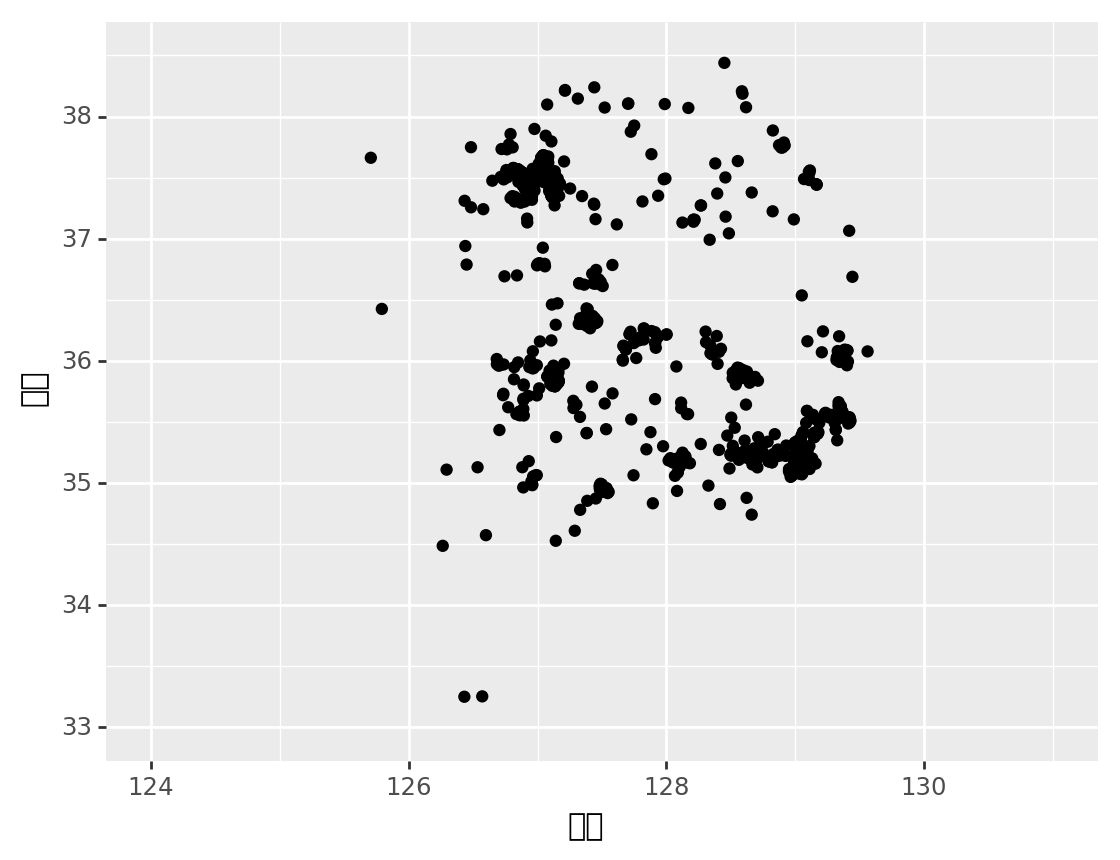

<ggplot: (-9223363276787187361)>

In [51]:
(
    ggplot(aes(x='경도', y='위도'), df) +
    geom_point() +
    xlim([124, 131]) +
    ylim([33, 38.5])
)

"도서관명"과 "지역" 분리하기.

In [52]:
# 이상한게 없는지 확인해보기 unique
# df['도서관명'].str.extract(r'\(([^)]+)\)$', expand=False).unique()

df['시도'] = df['도서관명'].str.extract(r'\(([^)]+)\)$', expand=False)
df.head()

,key,도서관명,전화번호,위경도,좌석수,도서,연속간행물,비도서,휴관일,자료수,위도,경도,시도
0,0,한밭도서관(대전광역시),042-270-7420,"36.309678,127.409648",656,802933,530,123515,매주 월요일,926978,36.309677,127.409645,대전광역시
1,1,충주시립도서관(충청북도),043-850-3971,"37.160015,127.450014",517,378786,117,10175,매주 월요일,389078,37.160015,127.450012,충청북도
2,2,김해도서관(경상남도),055-320-5510,"35.233151,128.874325",1202,322150,195,17470,매주 월요일 및 국가지정공휴일,339815,35.233150,128.874329,경상남도
3,3,강릉시립중앙도서관(강원도),033-660-3279,"37.773104,128.912992",464,316468,24,6072,월요일 및 국가지정 공휴일,322564,37.773106,128.912994,강원도
4,4,하안도서관(경기도),02-2680-2874,"37.467855,126.873710",806,315548,916,30410,"매주 금요일, 국가지정공휴일",346874,37.467854,126.873711,경기도


split() 함수도 쓸수있음.

In [0]:
df['도서관명'] = df['도서관명'].str.split('(',expand=True)[0]


In [54]:
df['도서관명']

0              한밭도서관
1            충주시립도서관
2              김해도서관
3          강릉시립중앙도서관
4              하안도서관
5          경기도립성남도서관
6              창원도서관
7              남부도서관
8            시립중앙도서관
9              석수도서관
10             중앙도서관
11             만안도서관
12           완산시립도서관
13             완산도서관
14             중앙도서관
15             마산도서관
16           제천시립도서관
17           서산시립도서관
18             동부도서관
19           성동구립도서관
20             시립도서관
21             산본도서관
22           원주교육문화관
23             금정도서관
24             울주도서관
25             평촌도서관
26          전북교육문화회관
27             광명도서관
28              마동분관
29           이천시립도서관
            ...     
1141    가야1동가얏골미니도서관
1142          솔로몬도서관
1143     우정혁신LH2차책사랑
1144        작은여울 도서관
1145           중원아사모
1146      리빙스턴 작은도서관
1147       에뜰3차아름도서관
1148         능주면민도서관
1149           카르페디엠
1150         해망마을도서관
1151        꿈꾸는작은도서관
1152         홈스쿨지원센터
1153          문창비젼문고
1154        작은도서관옹달샘
1155       잠정햇살마을도서관
1156        바람꽃작은도서관
1157        절

관찰 단위(observational units)에 따라 표 두 개(도서관, 소장자료)로 분리하기.

In [55]:
libraries = df[['key', '도서관명', '시도', '위도', '경도', '좌석수', '전화번호', '휴관일']]

collections = df[['key', '도서', '연속간행물', '비도서']]
collections.head()

,key,도서,연속간행물,비도서
0,0,802933,530,123515
1,1,378786,117,10175
2,2,322150,195,17470
3,3,316468,24,6072
4,4,315548,916,30410


칼럼 제목에 담긴 데이터(범주형 데이터)를 변수로 만들기.

In [56]:
collections.head()
# melt(녹인다) > 옆으로 길게 되어있는 것을 아래로 길게 이어붙이는 방식(?)

,key,도서,연속간행물,비도서
0,0,802933,530,123515
1,1,378786,117,10175
2,2,322150,195,17470
3,3,316468,24,6072
4,4,315548,916,30410


In [0]:
collections = collections.melt(id_vars='key', 
                               value_vars=['도서','연속간행물', '비도서'],
                               var_name='종류' , value_name='수량')

In [58]:
collections[collections['key'] == 0]

,key,종류,수량
0,0,도서,802933
1171,0,연속간행물,530
2342,0,비도서,123515


In [59]:
collections.sort_values(by='key')

,key,종류,수량
0,0,도서,802933
1171,0,연속간행물,530
2342,0,비도서,123515
1,1,도서,378786
1172,1,연속간행물,117
2343,1,비도서,10175
2,2,도서,322150
1173,2,연속간행물,195
2344,2,비도서,17470
3,3,도서,316468


휴관일은 어떻게 하면 좋을까?

In [109]:
df['휴관일'].unique()

# '월화목금공' '월화공' ''
# 이렇게 나누어 줄 수도 있지만 월, 화, ... , 일, 공 을 각각의 칼럼을 따로 만들어 주는 게 
# 좀 더 다루기에 쉬움
# 하지만 이렇게 만들면 데이터가 sparse함.(빈공간 False)이 너무 많아 공간을 낭비.
# 그렇기 때문에 melt를 시켜주는 것.
# '휴무'라는 칼럼에 휴일인 행만 들어가지는 것.
# 0 월
# 0 토
# 0 일
# 1 일
# 1 공

array(['매주 월요일', '매주 월요일 및 국가지정공휴일', '월요일 및 국가지정 공휴일', '매주 금요일, 국가지정공휴일',
       '매주월요일, 국가지정공휴일', '매주 월요일, 법정공휴일', '매주월요일+국가지정공휴일',
       '매주 월요일, 국가지정공휴일', '공휴일', '법정공휴일', '매주월요일, 법정공휴일', '매주월요일,국가지정공휴일',
       '월요일', '매주 월요일 국가지정 공휴일', '매주월요일 국가지정공휴일', '매주 월요일 및 국가지정 공휴일',
       '월요일, 법정공휴일', '월요일, 공휴일', '토요일+일요일+공휴일', '매주 월요일 및 법정공휴일', '매주월요일',
       '일요일, 법정공휴일', '매주 일요일', '토,일,공휴일', '매주토, 일요일', '매주토,일요일', '없음',
       '법정공휴일, 주말', '국가지정공휴일', '매주일요일+국가지정공휴일', '법정공휴일, 일요일', '일요일',
       '매주 토/일요일/국가지정공휴일', '매주 토요일, 일요일, 법정공휴일', '매주월,일요일,국가지정공휴일',
       '매주 토,일요일,국가지정공휴일', '토요일, 법정공휴일', '일요일, 공휴일', '매주 주말, 국가지정공휴일',
       '매주 일요일, 국가지정공휴일', '매주토요일, 매주일요일, 법정공휴일', '매주 토, 일요일 및 국가지정 공휴일',
       '주말, 법정공휴일', '매주 일, 월요일/ 법정 공휴일', '토, 일, 공휴일', '토 일 공휴일',
       '매주 토요일·일요일, 국가지정공휴일', '매주 토요일, 일요일, 공휴일', '토, 일, 법정공휴일'],
      dtype=object)

In [0]:
# 처음엔 이렇게 하려고 시도했음.
# closed_days = df['휴관일'].str.extractall(r'주\s?([월화수목금토]|공|[^요][^휴]일|^\b일$),?요일')

In [0]:
df['일'] = df['휴관일'].str.extract(r'(일요일|주말|[\s\b,]일[\s\b,]?)', expand=False)
df['월'] = df['휴관일'].str.extract(r'(월)', expand=False)
df['화'] = df['휴관일'].str.extract(r'(화)', expand=False)
df['수'] = df['휴관일'].str.extract(r'(수)', expand=False)
df['목'] = df['휴관일'].str.extract(r'(목)', expand=False)
df['금'] = df['휴관일'].str.extract(r'(금)', expand=False)
df['토'] = df['휴관일'].str.extract(r'([토]요일|주말|[\s\b,]?토[\s\b,]?)', expand=False)
df['공'] = df['휴관일'].str.extract(r'(공)', expand=False)
df.head()

In [0]:
closed_days = df[['key', '일', '월', '화', '수', '목', '금', '토', '공']]
 
closed_days

In [25]:
closed_days = closed_days.melt(id_vars='key', 
                               value_vars=['일','월', '화', '수', '목', '금', '토', '공'],
                               var_name='휴관일' , value_name='휴관여부')

closed = closed_days.loc[closed_days['휴관여부'], ['key', '휴관일']]
closed

/usr/local/lib/python3.6/dist-packages/pandas/core/reshape/reshape.py:731: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  frame = frame.loc[:, id_vars + value_vars]
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:1367: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


KeyError: ignored

# 데이터 다시 살펴보기

시도별 도서관 수는?

In [62]:
libraries.head()
libraries.groupby(by='시도')['시도'].count()
libraries['시도'].value_counts()

서울특별시      222
경상남도       198
경기도        165
부산광역시      104
전라북도       101
울산광역시       69
강원도         53
충청북도        52
대전광역시       50
전라남도        44
경상북도        41
대구광역시       40
충청남도        16
인천광역시       11
광주광역시        3
제주특별자치도      2
Name: 시도, dtype: int64

소장자료수(도서, 연속간행물, 비도서를 모두 합한 값)가 가장 많은 도서관은?

일요일에 쉬는 도서관은?

# 데이터 저장하기

다듬어진 데이터를 파일로 저장하기

In [0]:
with open('library.csv', 'w') as f:
# open : 쓰기모드로 파일을 열기
# 로컬 파일을 연 다음 csv형태로 저장.

 df.to_csv(f)
# 주피터를 쓰면 바로 폴더가 생성됨.

from google.colab import files
files.download('library.csv')

# 여기까지 써줘야 구글콜랩에서 저장됨.
# 한글은 메모장, 엑셀보다는 아톰에서 열면 안깨질듯
# 가져오기 메뉴에서 utf-8으로 불러오면 엑셀에서도 안깨질듯